In [4]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

import random
import os
import torch
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from pylab import rcParams
import seaborn as sns

import statsmodels.api as sm
import math
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error

from prophet import Prophet
from neuralprophet import NeuralProphet
import lightgbm
import optuna

plt.rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

In [5]:
CFG = {
    'TRAIN_WINDOW_SIZE':90, # 90일치로 학습
    'PREDICT_SIZE':21, # 21일치 예측
    'EPOCHS':10,
    # 'LEARNING_RATE':1e-4,
    'BATCH_SIZE':256,
    'SEED':41
}

In [6]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) # Seed 고정

In [7]:
train_data = pd.read_csv('./train.csv').drop(columns=['ID', '제품', '대분류', '중분류', '소분류', '브랜드'])

In [8]:
train_data.head()

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
submit = pd.read_csv('./sample_submission.csv')
submit.head()

,ID,2023-04-05,2023-04-06,2023-04-07,2023-04-08,2023-04-09,2023-04-10,2023-04-11,2023-04-12,2023-04-13,...,2023-04-16,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24,2023-04-25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test_temp = pd.DataFrame({'ds':submit.drop(columns=['ID']).columns})

for i in tqdm(range(len(train_data))):
    train_temp = pd.DataFrame({'ds':train_data.columns, 'y':train_data.iloc[i]})
    train_temp.reset_index(drop=True, inplace=True)
    
    m= Prophet().fit(train_temp)
    
    pred = m.predict(test_temp).yhat
    submit.iloc[i] = [i] + np.round(pred, 0).tolist()
    
    clear_output()
    
print('done')

100%|██████████| 15890/15890 [1:47:35<00:00,  2.46it/s]

done


In [22]:
train_data

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [39]:
for i in range(len(submit)):
    tmp = []
    for j in submit.iloc[i][1:]:
        if j < 0:
            j = 0
        tmp.append(j)
    submit.iloc[i] = [submit.iloc[i][0]] + tmp

In [40]:
submit

,ID,2023-04-05,2023-04-06,2023-04-07,2023-04-08,2023-04-09,2023-04-10,2023-04-11,2023-04-12,2023-04-13,...,2023-04-16,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24,2023-04-25
0,0,2,2,2,1,1,1,1,2,2,...,1,1,1,2,2,2,1,1,1,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,2,3,3,2,1,1,1,2,...,2,1,1,1,2,3,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,8,12,17,21,24,17,9,8,12,...,24,17,9,8,12,17,21,24,17,9
15886,15886,10,11,11,11,10,9,9,10,11,...,10,9,9,10,11,11,11,10,9,9
15887,15887,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
submit.to_csv('./prophet_submit.csv', index=False)

<AxesSubplot:>

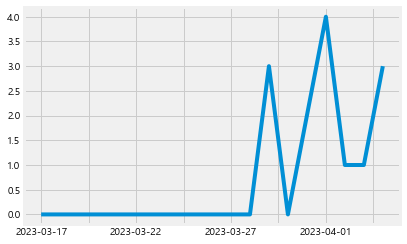

In [63]:
train_data.iloc[15886][440:460].plot()

<AxesSubplot:>

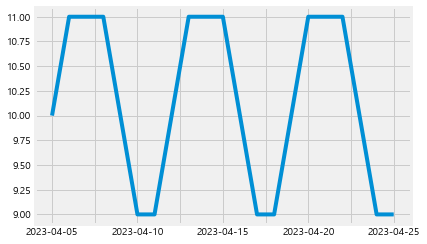

In [55]:
submit[submit.columns[1:]].iloc[15886].plot()